#Version two
Here is version of code which forecast the weather using AI (Artificial Intelligene), this code is feasible. the data obtained contains the cities and weather condition informations. The city Madrid was picked to train since it has less missing values. the model can be trained with other data (ex:iraqi data).

## Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing


## Download the dataset
the data downloaded from kaggle ehich is website and community that provide a variety of datasets can be used for studies, research and educational purposes.
  https://www.kaggle.com/datasets

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! kaggle datasets download -d sudalairajkumar/daily-temperature-of-major-cities

100% 12.9M/12.9M [00:01<00:00, 15.3MB/s]
100% 12.9M/12.9M [00:01<00:00, 8.51MB/s]


In [4]:
! unzip /content/daily-temperature-of-major-cities.zip

Archive:  /content/daily-temperature-of-major-cities.zip
  inflating: city_temperature.csv    


## Read the dataset

In [ ]:
dataset = pd.read_csv("/content/city_temperature.csv")

<ipython-input-9-f469bb888b7a>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("/content/city_temperature.csv")


In [ ]:
dataset

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


## Prepare the data



*   Using the data from Spain using the query method in the Country column.
*   Dropping the columns that are not required.
*   Normalize the datase.
*   Plot the histagram of the dataset before and after the normalization.

In [ ]:
dataset.query('Country == "Spain" and City =="Madrid"', inplace = True)


In [ ]:
dataset

,Region,Country,State,City,Month,Day,Year,AvgTemperature
921973,Europe,Spain,NaN,Madrid,1,1,1995,45.9
921974,Europe,Spain,NaN,Madrid,1,2,1995,40.0
921975,Europe,Spain,NaN,Madrid,1,3,1995,34.1
921976,Europe,Spain,NaN,Madrid,1,4,1995,37.0
921977,Europe,Spain,NaN,Madrid,1,5,1995,43.1
...,...,...,...,...,...,...,...,...
931234,Europe,Spain,NaN,Madrid,5,9,2020,67.0
931235,Europe,Spain,NaN,Madrid,5,10,2020,60.1
931236,Europe,Spain,NaN,Madrid,5,11,2020,60.6
931237,Europe,Spain,NaN,Madrid,5,12,2020,55.3


<Axes: >

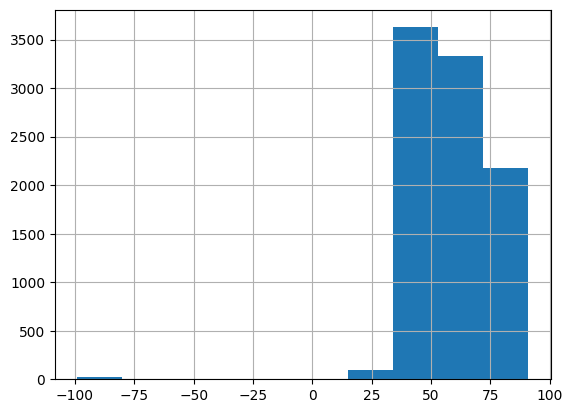

In [ ]:
dataset['AvgTemperature'].hist()

In [ ]:
dataset.isnull().sum()

Region               0
Country              0
State             9266
City                 0
Month                0
Day                  0
Year                 0
AvgTemperature       0
dtype: int64

In [ ]:
dataset.drop(columns=["Region", "State", "City", "Month", "Day", "Year"], inplace=True)

In [ ]:
x_normalizer = preprocessing.StandardScaler(with_std=True)
x_normalizer.fit(dataset.AvgTemperature.to_numpy().reshape(-1, 1))
x_norm = x_normalizer.transform(dataset.AvgTemperature.to_numpy().reshape(-1, 1))

## Create the time series dataset using Time Series Data Generator

In [ ]:
time_serises = tf.keras.preprocessing.sequence.TimeseriesGenerator(
    x_norm,dataset['AvgTemperature'].to_numpy().reshape(-1, 1), length=7, batch_size=32)

In [ ]:
x, y = time_serises[0]

In [ ]:
x[:3]

array([[[-0.75362085],
        [-1.10818012],
        [-1.4627394 ],
        [-1.2884645 ],
        [-0.92188627],
        [-0.70554502],
        [-0.8858294 ]],

       [[-1.10818012],
        [-1.4627394 ],
        [-1.2884645 ],
        [-0.92188627],
        [-0.70554502],
        [-0.8858294 ],
        [-1.07813273]],

       [[-1.4627394 ],
        [-1.2884645 ],
        [-0.92188627],
        [-0.70554502],
        [-0.8858294 ],
        [-1.07813273],
        [-0.92789575]]])

In [ ]:
y[:2]

array([[40.5],
       [43. ]])

In [ ]:
print(x.shape)
print(y.shape)

(32, 7, 1)
(32, 1)


## Create data from the generator and split the data into training and testing

In [ ]:
train_data = np.array([])
test_data = np.array([])
for x, y in time_serises:
    train_data = np.append(train_data, x)
    test_data = np.append(test_data, y)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(64813,)
(9259,)


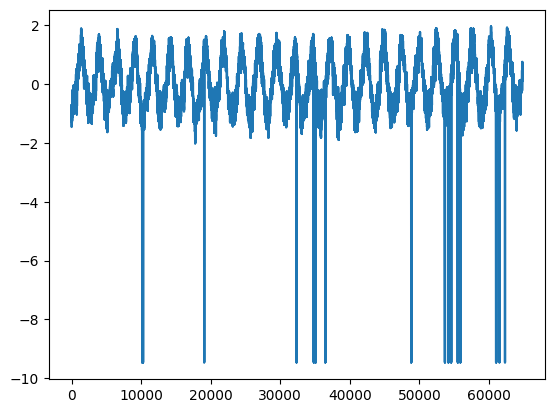

In [ ]:
plt.plot(train_data)

## Make sure the data shape is (batch_size,length,1) and the target shape is (batch_size,1)

In [ ]:
x = train_data.reshape(-1, 7, 1)
y = test_data.reshape(-1, 1)

In [ ]:
print(x.shape)
print(y.shape)

(9259, 7, 1)
(9259, 1)


## Get the max value of the dataset

In [ ]:
scale = x_normalizer.scale_
var = x_normalizer.var_
mean = x_normalizer.mean_

print(scale)
print(var)
print(mean)
print(x_normalizer.n_samples_seen_)


[16.64037721]
[276.90215357]
[58.44053529]
9266


## Create the Data Pipeline

In [ ]:
def dataset_creater(x, y):
    data = tf.data.Dataset.from_tensor_slices((x, y))
    data = data.shuffle(9259)
    data = data.batch(32)
    data = data.prefetch(tf.data.AUTOTUNE)
    return data


train_dataset = dataset_creater(x[:-100], y[:-100])

## Create the Forecasting Model

In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input((7, 1)),
        tf.keras.layers.Conv1D(7, kernel_size=3, padding="same", activation=tf.nn.leaky_relu),
        tf.keras.layers.GRU(32, return_sequences=True,kernel_initializer=tf.initializers.glorot_normal(seed=42)),
        tf.keras.layers.GRU(64),
        tf.keras.layers.Dense(1),
        tf.keras.layers.Lambda(lambda x: x *(9622))
    ]
)


##Training the model

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.Huber())
model.fit(train_dataset, epochs=50, validation_data=(x[-100:], y[-100:]))

Epoch 1/50
287/287 [==============================] - 22s 15ms/step - loss: 27.5949 - val_loss: 7.0374
Epoch 2/50
287/287 [==============================] - 3s 12ms/step - loss: 12.6040 - val_loss: 5.5918
Epoch 3/50
287/287 [==============================] - 3s 10ms/step - loss: 9.3747 - val_loss: 5.3019
Epoch 4/50
287/287 [==============================] - 3s 10ms/step - loss: 6.4340 - val_loss: 2.5990
Epoch 5/50
287/287 [==============================] - 2s 6ms/step - loss: 5.4703 - val_loss: 3.1724
Epoch 6/50
287/287 [==============================] - 2s 6ms/step - loss: 6.8546 - val_loss: 17.8705
Epoch 7/50
287/287 [==============================] - 2s 6ms/step - loss: 5.8058 - val_loss: 2.4255
Epoch 8/50
287/287 [==============================] - 2s 6ms/step - loss: 4.7340 - val_loss: 3.9693
Epoch 9/50
287/287 [==============================] - 5s 15ms/step - loss: 4.8163 - val_loss: 4.8710
Epoch 10/50
287/287 [==============================] - 3s 9ms/step - loss: 4.3496 - val_los

##Predict the last 100 sample of the x

In [ ]:
pred = model.predict(x[-100:])

4/4 [==============================] - 1s 5ms/step


# Plot the prediction
Here we see the predicted and the actual values are close.

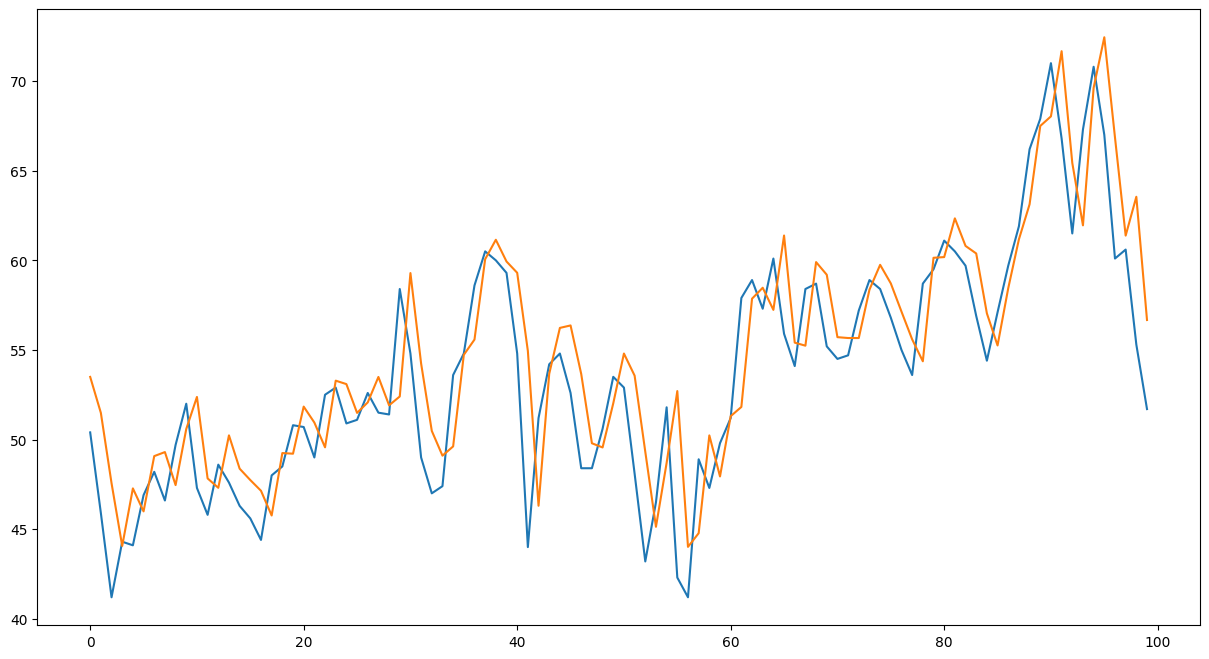

In [ ]:
plt.figure(figsize=(15, 8))
true_y = y[-100:]
plt.plot(true_y)
plt.plot(pred.reshape(-1))

### Predict

In [ ]:
a = [[-1.4627394 ],
       [-1.2884645 ],
       [-0.92188627],
       [-0.70554502],
       [-0.8858294 ],
       [-1.07813273],
       [-0.92789575]]


def make_pred(x, days=1):
    pred_list = []
    for i in range(days):

        pred = model.predict([x])
        pred_list.append(pred.reshape(-1)[0])
        x.pop(0)
        x.append([pred[0][0] / 9622])

    return pred_list


pred = make_pred(a)
true_y = y[1]
print("predicted: ", pred)
print("Actual: ", true_y)

1/1 [==============================] - 0s 106ms/step
predicted:  [44.46906]
Actual:  [43.]
